#  Load the Dataset

In [10]:
# import libarary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("covid.csv")

# first few rows of the dataset
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


#  Summary Statistics

In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SNo              306429 non-null  int64 
 1   ObservationDate  306429 non-null  object
 2   Province/State   228326 non-null  object
 3   Country/Region   306429 non-null  object
 4   Last Update      306429 non-null  object
 5   Confirmed        306429 non-null  int64 
 6   Deaths           306429 non-null  int64 
 7   Recovered        306429 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ MB


# Analysis

### 1. Total Number of Confirmed Cases Worldwide

In [13]:
total_confirmed = df['Confirmed'].sum()
print('Total confirmed cases worldwide :',total_confirmed)

Total confirmed cases worldwide : 26252051758


### 2. Total Number of Deaths Worldwide

In [14]:
total_deaths=df['Deaths'].sum()
print('Total deaths reported globally :',total_deaths)

Total deaths reported globally : 624013017


### 3. Total Number of Recovered Cases Worldwide

In [15]:
total_recovered = df['Recovered'].sum()
print("Total recovered cases worldwide:", total_recovered)

Total recovered cases worldwide: 15450237912


### 4. Number of Countries/Regions Represented in the Dataset

In [16]:
num_countries = df['Country/Region'].nunique()
print("Number of countries/regions represented in the dataset:", num_countries)

Number of countries/regions represented in the dataset: 229


### 5. Trend of Confirmed Cases Over Time Globally

C:\Users\soumyjeet sahoo\AppData\Local\Temp\ipykernel_2084\2881042326.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], infer_datetime_format=True, errors='coerce')


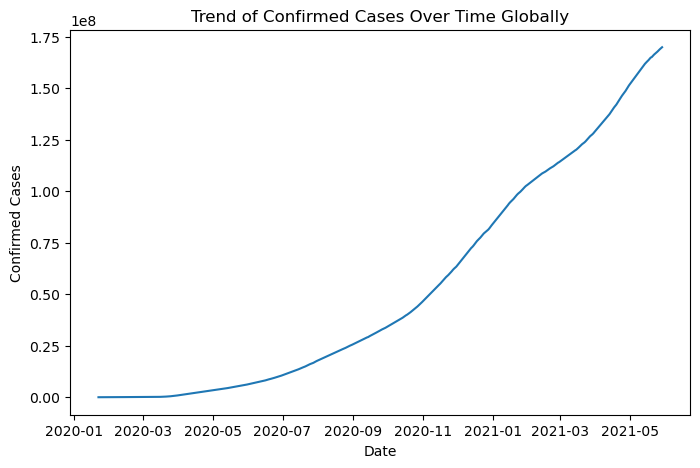

In [17]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], infer_datetime_format=True, errors='coerce')
daily_confirmed = df.groupby('ObservationDate')['Confirmed'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(daily_confirmed)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Trend of Confirmed Cases Over Time Globally')
plt.show()

### 6. Province/State with the Highest Number of Confirmed Cases

In [18]:
province_highest_confirmed = df.groupby('Province/State')['Confirmed'].sum().sort_values(ascending=False).head(1).index[0]
print("Province/State with the highest number of confirmed cases:", province_highest_confirmed)

Province/State with the highest number of confirmed cases: California


### 7. Country/Region with the Highest Number of Deaths

In [19]:
country_highest_deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(1).index[0]
print("Country/Region with the highest number of deaths:", country_highest_deaths)

Country/Region with the highest number of deaths: US


### 8. Variation of Confirmed Cases Across Different Provinces/States

In [20]:
confirmed_by_province = df.groupby('Province/State')['Confirmed'].sum()
print("Confirmed cases by province/state :\n", confirmed_by_province)

Confirmed cases by province/state :
 Province/State
 Montreal, QC                17
 Norfolk County, MA           7
Abruzzo                10889970
Acre                   14897611
Adygea Republic         3012608
                         ...   
Zaporizhia Oblast      13858457
Zeeland                 3454955
Zhejiang                 620252
Zhytomyr Oblast        11740027
Zuid-Holland           55835700
Name: Confirmed, Length: 736, dtype: int64


### 9. Trend of Deaths Over Time Globally

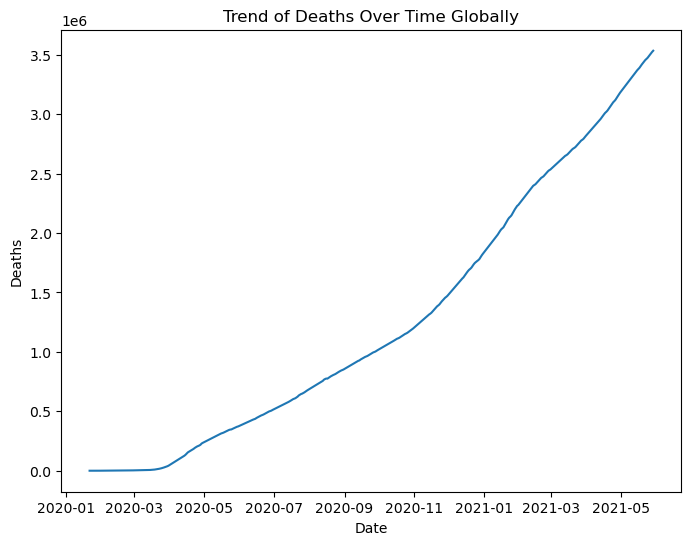

In [21]:
daily_deaths = df.groupby('ObservationDate')['Deaths'].sum()
plt.figure(figsize=(8,6))
sns.lineplot(daily_deaths)
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Trend of Deaths Over Time Globally')
plt.show()


### 10. Country/Region with the Highest Number of Recovered Cases

In [22]:
country_highest_recovered=df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(1).index[0]
print("Country/Region with the highest number of recovered cases:", country_highest_recovered)

Country/Region with the highest number of recovered cases: India


### 11. Variation of Recovered Cases Across Different Countries/Regions

In [23]:
recovered_by_country = df.groupby('Country/Region')['Recovered'].sum()
print("Recovered cases by country/region :\n", recovered_by_country)

Recovered cases by country/region :
 Country/Region
 Azerbaijan                              0
('St. Martin',)                          0
Afghanistan                       13464399
Albania                           13945256
Algeria                           18959299
                                    ...   
West Bank and Gaza                37003116
Yemen                               506523
Zambia                            12625626
Zimbabwe                           5594887
occupied Palestinian territory           0
Name: Recovered, Length: 229, dtype: int64


### 12. Distribution of Confirmed Cases by Country/Region

In [24]:
recovered_by_country = df.groupby('Country/Region')['Confirmed'].sum()
print("Recovered cases by country/region :\n", recovered_by_country)

Recovered cases by country/region :
 Country/Region
 Azerbaijan                              1
('St. Martin',)                          2
Afghanistan                       17026442
Albania                           19768869
Algeria                           27684358
                                    ...   
West Bank and Gaza                41819444
Yemen                               962066
Zambia                            13493953
Zimbabwe                           6484581
occupied Palestinian territory          25
Name: Confirmed, Length: 229, dtype: int64


### 13. Correlation Between Confirmed Cases and Deaths

Correlation between confirmed cases and deaths: 0.89


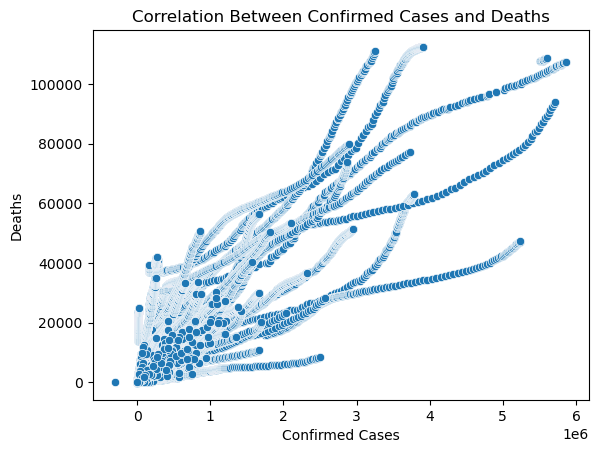

In [25]:
correlation_confirmed_deaths = df[['Confirmed','Deaths']].corr().iloc[0,1]
print("Correlation between confirmed cases and deaths:", correlation_confirmed_deaths.round(2))

sns.scatterplot(x='Confirmed', y='Deaths', data=df)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Correlation Between Confirmed Cases and Deaths')
plt.show()

### 14. Correlation Between Confirmed Cases and Recovered Cases

Correlation between confirmed cases and recovered cases: 0.63


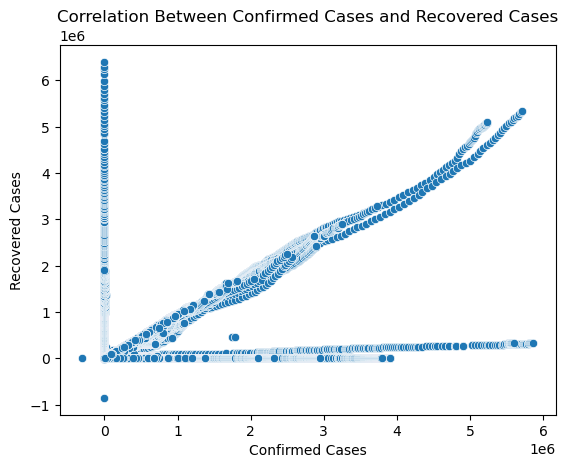

In [26]:
correlation_confirmed_recovered = df[['Confirmed','Recovered']].corr().iloc[0,1]
print("Correlation between confirmed cases and recovered cases:", correlation_confirmed_recovered.round(2))

sns.scatterplot(x='Confirmed', y='Recovered', data=df)
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.title('Correlation Between Confirmed Cases and Recovered Cases')
plt.show()

### 15. Mortality Rate by Country/Region

In [27]:
df['Mortality_rate'] = (df['Deaths']/df['Confirmed'])*100
mortality_rate_by_country = df.groupby('Country/Region')['Mortality_rate'].mean()
print("Mortality rate by country/region:\n", mortality_rate_by_country.round(2))

Mortality rate by country/region:
 Country/Region
 Azerbaijan                        0.00
('St. Martin',)                    0.00
Afghanistan                        3.44
Albania                            2.58
Algeria                            4.49
                                  ...  
West Bank and Gaza                 0.85
Yemen                             24.65
Zambia                             1.86
Zimbabwe                           4.58
occupied Palestinian territory     0.00
Name: Mortality_rate, Length: 229, dtype: float64


### 16. Recovery Rate Across Different Countries/Regions

In [28]:
df['Recovery_rate']=(df['Recovered']/df['Confirmed'])*100
recovery_rate_by_country = df.groupby('Country/Region')['Recovery_rate'].mean()
print("Recovery rate by country/region :\n", recovery_rate_by_country.round(2))

Recovery rate by country/region :
 Country/Region
 Azerbaijan                        0.00
('St. Martin',)                    0.00
Afghanistan                       61.84
Albania                           59.61
Algeria                           60.55
                                  ...  
West Bank and Gaza                70.75
Yemen                             47.53
Zambia                            80.08
Zimbabwe                          62.70
occupied Palestinian territory     0.00
Name: Recovery_rate, Length: 229, dtype: float64


### 17. Trend of New Confirmed Cases Over Time Globally

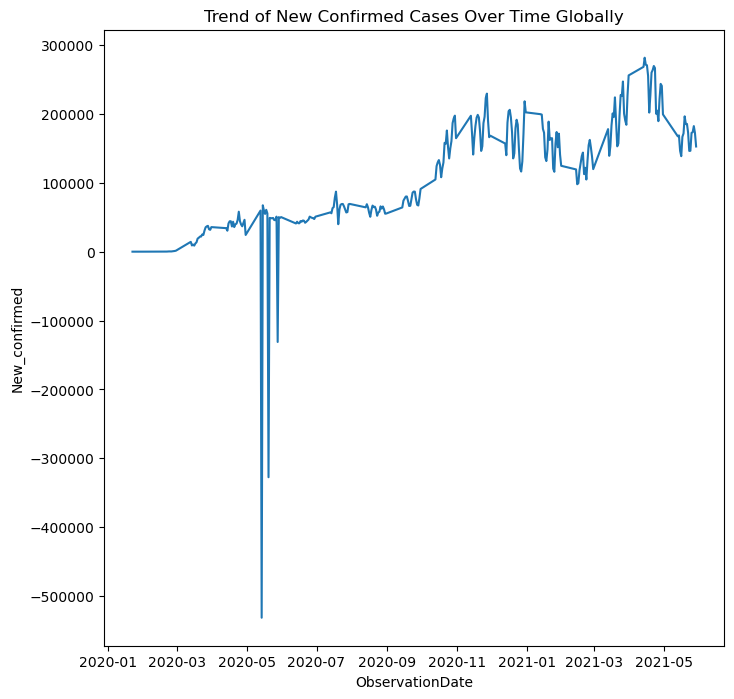

In [29]:
df['New_confirmed']=df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
new_confirmed_trend = df.groupby('ObservationDate')['New_confirmed'].sum()
plt.figure(figsize=(8,8))
sns.lineplot(new_confirmed_trend)
plt.title('Trend of New Confirmed Cases Over Time Globally')
plt.show()

### 18. Fatality Rate Across Different Provinces/States

In [30]:
df['Fatality_rate']=(df['Deaths']/df['Confirmed'])*100
fatality_rate_by_province = df.groupby('Province/State')['Fatality_rate'].mean()
print("Fatality rate by province/state :\n", fatality_rate_by_province.round(2))

Fatality rate by province/state :
 Province/State
 Montreal, QC          0.00
 Norfolk County, MA    0.00
Abruzzo                7.33
Acre                   2.17
Adygea Republic        0.92
                       ... 
Zaporizhia Oblast      1.77
Zeeland                2.83
Zhejiang               0.07
Zhytomyr Oblast        1.80
Zuid-Holland           2.99
Name: Fatality_rate, Length: 736, dtype: float64


### 19. Recovery Rate Across Different Provinces/States

In [31]:
recovery_rate_by_province = df.groupby('Province/State')['Recovery_rate'].mean()
print("Recovery rate by province/state :\n", recovery_rate_by_province.round(2))

Recovery rate by province/state :
 Province/State
 Montreal, QC           0.00
 Norfolk County, MA     0.00
Abruzzo                68.28
Acre                   76.04
Adygea Republic        83.22
                       ...  
Zaporizhia Oblast      61.23
Zeeland                 0.00
Zhejiang               93.55
Zhytomyr Oblast        71.09
Zuid-Holland            0.00
Name: Recovery_rate, Length: 736, dtype: float64


### 20. Trend of Active Cases Over Time Globally

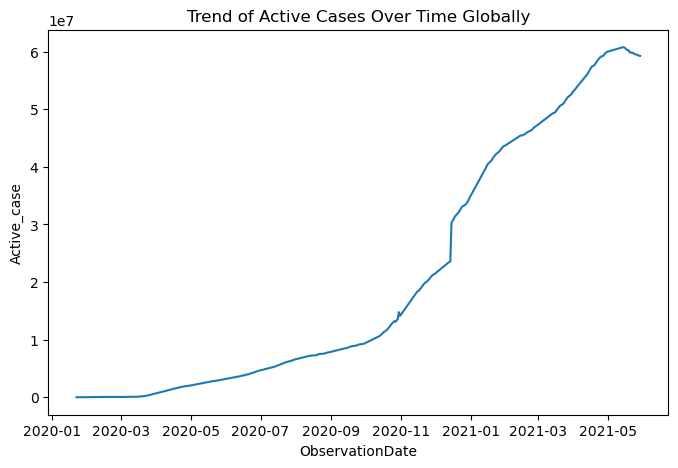

In [32]:
df['Active_case']=df['Confirmed'] - df['Deaths'] - df['Recovered']
active_cases_trend = df.groupby('ObservationDate')['Active_case'].sum()
plt.figure(figsize=(8,5))
sns.lineplot(active_cases_trend)
plt.title('Trend of Active Cases Over Time Globally')
plt.show()